In [1]:
## ANALYSIS OF BREAST CANCER DATA USING LOGISTIC REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

In [2]:
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
BC = pd.read_excel('cancer.xlsx')

In [4]:
BC.head()

,PAT_ID,Race,MarST,Gender,PatStatus,AgeDiag,Grade,Stability,No.Visits,Lstay,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
0,32400010,3,1,0,1,52,3,0,5,1,...,1,1,5,1,1,1,1,2,1,1
1,32400023,3,1,0,1,48,3,0,4,3,...,1,1,1,1,0,1,0,1,0,1
2,32400073,3,0,1,1,61,3,0,9,1,...,1,1,2,1,1,1,0,2,0,0
3,32400073,3,1,1,1,63,2,0,3,5,...,1,0,7,1,1,1,0,2,0,0
4,32400396,3,0,0,0,69,2,0,7,9,...,1,0,1,1,1,1,1,2,1,1


In [5]:
## We Consider Both Sex

#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np

In [7]:
y = BC.PatStatus
x = BC.drop(['PatStatus','PAT_ID'], axis = 1)


In [8]:
#Split the data into train and test sets #
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)

## Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [9]:
log_reg = sm.Logit(y_train, x_train)
log_reg = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.451584
         Iterations 7


In [10]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              PatStatus   No. Observations:                80001
Model:                          Logit   Df Residuals:                    79977
Method:                           MLE   Df Model:                           23
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.3466
Time:                        00:02:16   Log-Likelihood:                -36127.
converged:                       True   LL-Null:                       -55289.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Race            0.0056      0.001      8.874      0.000       0.004       0.007
MarST           0.0538      0.019      2.895      0.004       0.017       0.090
Gender         -0.0592      0.026     -2.255    

In [11]:
## exclude insignificant variables in the model
y = BC.PatStatus
x = BC.drop(['PatStatus', 'PAT_ID','Grade','Suture','Dermal'], axis = 1)

In [12]:
#Split the data into train and test sets #
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)


## Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)



In [13]:

## The new fitted logistic regression model with selected variables
import statsmodels.api as sm
log_reg = sm.Logit(y_train, x_train)
log_reg = log_reg.fit()

log_reg1 = LogisticRegression()
log_reg1.fit(x_train_minmax, y_train)

Optimization terminated successfully.
         Current function value: 0.451626
         Iterations 7


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              PatStatus   No. Observations:                80001
Model:                          Logit   Df Residuals:                    79980
Method:                           MLE   Df Model:                           20
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.3465
Time:                        00:38:12   Log-Likelihood:                -36131.
converged:                       True   LL-Null:                       -55289.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Race            0.0056      0.001      8.858      0.000       0.004       0.007
MarST           0.0535      0.019      2.882      0.004       0.017       0.090
Gender         -0.0567      0.026     -2.166    

In [15]:
## Score of the model giving the accuracy of the model
print("Accuracy", (log_reg1.score(x_test_minmax, y_test)))

Accuracy 0.8024098795060247


In [16]:
### PREDICTION ON THE TEST DATASET

In [17]:
### Getting the prediction for the Testing dataset
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

x_train = x_train_minmax
x_test = x_test_minmax 

In [18]:
tns_probs=[0 for _ in range(len(y_test))]
y_predict = log_reg1.predict(x_test)

In [19]:
 ## Keeping the probabilities for Testing outcomes
y_pred = log_reg1.predict_proba(x_test)
y_pred = y_pred[:,1]

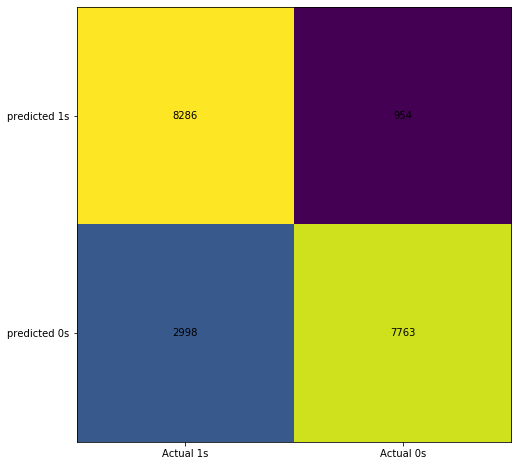

In [20]:
 ## confusion matrix
test_cm = confusion_matrix(y_test, np.round(y_predict))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(test_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, test_cm[i, j], ha= 'center', va= 'center', color= 'black')
plt.show()

In [21]:
 ## Error for the prediction for test dataset outcomes
test_error = (test_cm[0,1] + test_cm[1,0])/np.sum(test_cm)
print(test_error)

0.1975901204939753


In [22]:
## Accuracy of prediction
1-test_error

0.8024098795060247

In [23]:
## Sensitivity Analysis
test_sens = test_cm[1, 1]/(test_cm[1, 1] + test_cm[0, 1])
print(test_sens)

0.8905586784444189


In [24]:
 ## Specificity Analysis
test_spec = test_cm[0, 0]/(test_cm[0, 0]+test_cm[1, 0])
print(test_spec)

0.7343140730237504


In [25]:
 ## PPV Analysis
test_npv = test_cm[1, 1]/(test_cm[1, 1] + test_cm[1, 0])
print(test_npv)

0.7214013567512313


In [26]:
## NPV Analysis
test_npv = test_cm[0, 0]/(test_cm[0, 0]+test_cm[0, 1])
print(test_npv)

0.8967532467532467


In [27]:
## The AUC Score
test_auc = roc_auc_score(y_test, tns_probs)
y_pred_auc = np.round(roc_auc_score(y_test, y_pred), decimals = 2)

In [28]:
 print(test_auc)

0.5


In [29]:
print(np.round(y_pred_auc, decimals = 2))

0.88


In [30]:
## calculate ROC Curves
test_fpr, test_tpr, _ = roc_curve(y_test, tns_probs)
y_pred_fpr, y_pred_tpr, _ = roc_curve(y_test, y_pred)

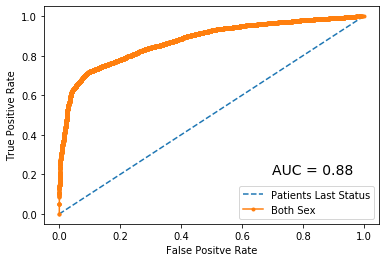

In [31]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt
plt.plot(test_fpr, test_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(y_pred_fpr, y_pred_tpr, marker = '.', label = 'Both Sex')
plt.text(0.7, 0.2, "AUC = " + str(y_pred_auc), fontsize = 14)
## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
## Show Legend
plt.legend()

In [1]:
## WE CONSIDER THE MALE AND FEMALE GENDER SEPERATELY FOR THE ANALYSIS

In [2]:
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Code
BC = (pd.read_excel('cancer.xlsx'))

In [4]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split
#Import numpy#
import numpy as np

## SPLITTING DATA INTO MALE AND FEMALE
BCM=BC[BC.Gender==1]
BCF=BC[BC.Gender==0]

In [5]:
#### THE MALE DATASET
my=BCM.PatStatus
mx=BCM.drop(['PatStatus','PAT_ID', 'Gender'], axis=1)

In [6]:
## THE FEMALE DATASET
fy=BCF.PatStatus
fx=BCF.drop(['PatStatus','PAT_ID', 'Gender'],axis=1)

In [7]:
#Split the Male data into train and test sets #
mx_train, mx_test, my_train, my_test=train_test_split(mx,my, test_size=0.2, random_state=124)


In [8]:
## CONSIDERING THE MALE DATA
mx_train.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
41599,1,1,65,3,0,16,9,2,1,0,...,1,0,2,1,1,1,0,1,0,1
25664,1,1,61,3,1,16,9,5,1,0,...,1,1,3,1,1,1,0,1,0,0
44540,6,0,74,2,0,10,9,8,1,0,...,1,0,2,1,1,1,0,1,0,1
46913,1,0,90,3,0,10,12,3,1,0,...,1,0,2,0,1,1,0,1,1,1
31494,1,1,71,3,0,10,9,4,1,0,...,1,0,2,1,1,1,0,1,1,1


In [9]:
mx_test.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
3055,1,0,62,1,0,4,5,5,1,0,...,1,0,1,1,0,1,0,2,0,0
30043,1,0,76,3,0,10,9,4,1,0,...,1,0,2,1,1,1,0,1,0,0
27137,1,0,85,2,0,10,9,4,1,0,...,1,0,2,0,1,1,0,1,0,0
22922,1,1,78,2,0,10,9,8,1,0,...,1,1,3,1,1,1,0,1,0,0
44064,1,1,45,2,0,14,9,2,1,0,...,1,0,2,0,1,1,0,1,0,1


In [10]:
mx_train.shape

(12479, 23)

In [11]:
mx_test.shape

(3120, 23)

In [12]:
## Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
mx_train_minmax = min_max_scaler.fit_transform(mx_train)
mx_test_minmax = min_max_scaler.fit_transform(mx_test)



In [13]:
 ## FITTING LOGISTIC REGRESSION FOR MALE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [14]:
mlog_reg = sm.Logit(my_train, mx_train)
mlog_reg = mlog_reg.fit()

Optimization terminated successfully.
         Current function value: 0.410336
         Iterations 8


In [15]:
print(mlog_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              PatStatus   No. Observations:                12479
Model:                          Logit   Df Residuals:                    12456
Method:                           MLE   Df Model:                           22
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.3622
Time:                        10:37:40   Log-Likelihood:                -5120.6
converged:                       True   LL-Null:                       -8029.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Race           -0.0008      0.002     -0.353      0.724      -0.005       0.004
MarST          -0.0004      0.050     -0.009      0.993      -0.099       0.098
AgeDiag         0.0026      0.002      1.357    

In [16]:
## Exclude insignificant variables in the model
my=BCM.PatStatus
mx=BCM.drop(['PatStatus','PAT_ID', 'Race', 'MarST','AgeDiag', 'Stability', 'Laterality', 'Eggshell', 'AxiAden', 'Distroph'], axis=1)

In [17]:
#Split the data into train and test sets #
mx_train, mx_test, my_train, my_test=train_test_split(mx,my, test_size=0.2, random_state=124)

## Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
mx_train_minmax = min_max_scaler.fit_transform(mx_train)
mx_test_minmax = min_max_scaler.fit_transform(mx_test)


In [18]:
## The new fitted logistic regression model with selected variables
import statsmodels.api as sm
mlog_reg = sm.Logit(my_train, mx_train)
mlog_reg = mlog_reg.fit()

mlog_reg1 = LogisticRegression()
mlog_reg1.fit(mx_train_minmax, my_train)

Optimization terminated successfully.
         Current function value: 0.410184
         Iterations 8


C:\Users\eagye\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print(mlog_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              PatStatus   No. Observations:                12479
Model:                          Logit   Df Residuals:                    12463
Method:                           MLE   Df Model:                           15
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.3625
Time:                        11:02:20   Log-Likelihood:                -5118.7
converged:                       True   LL-Null:                       -8029.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender          3.2186      1.137      2.832      0.005       0.991       5.446
Grade           0.1079      0.035      3.086      0.002       0.039       0.176
No.Visits      -0.0300      0.009     -3.302    

In [20]:
## Score of the model giving the accuracy of the model
print("Accuracy", (mlog_reg1.score(mx_test_minmax, my_test)))

Accuracy 0.8233974358974359


In [21]:
### PREDICTION ON THE TEST DATASET

In [22]:
### Getting the prediction for the Testing dataset
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

mx_train = mx_train_minmax
mx_test = mx_test_minmax 

In [23]:
tns_probs=[0 for _ in range(len(my_test))]
my_predict = mlog_reg1.predict(mx_test)

In [24]:
## Keeping the probabilities for Testing outcomes
my_pred = mlog_reg1.predict_proba(mx_test)
my_pred = my_pred[:, 1]

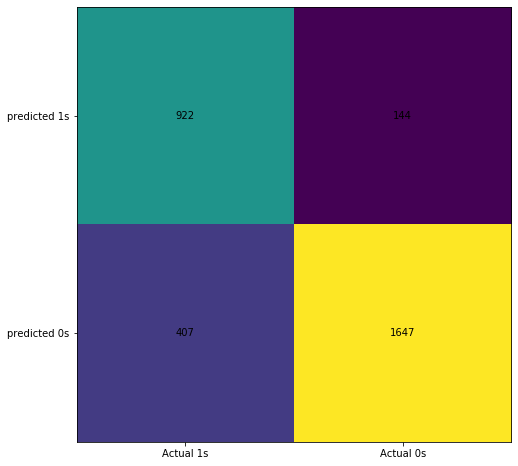

In [25]:
 ## confusion matrix
mtest_cm = confusion_matrix(my_test, np.round(my_predict))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(mtest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, mtest_cm[i, j], ha= 'center', va= 'center', color= 'black')
plt.show()

In [26]:
 ## Error for the prediction for test dataset outcomes
mtest_error = (mtest_cm[0,1] + mtest_cm[1,0])/np.sum(mtest_cm)
print(mtest_error)

0.1766025641025641


In [27]:
## Accuracy of prediction
1-mtest_error

0.8233974358974359

In [28]:
## Sensitivity Analysis
mtest_sens = mtest_cm[1, 1]/(mtest_cm[1, 1] + mtest_cm[0, 1])
print(mtest_sens)

0.9195979899497487


In [29]:
 ## Specificity Analysis
mtest_spec = mtest_cm[0, 0]/(mtest_cm[0, 0] + mtest_cm[1, 0])
print(mtest_spec)

0.6937547027840482


In [30]:
 ## PPV Analysis
mtest_npv = mtest_cm[1, 1]/(mtest_cm[1, 1] + mtest_cm[1, 0])
print(mtest_npv)

0.8018500486854917


In [31]:
## NPV Analysis
mtest_npv = mtest_cm[0, 0]/(mtest_cm[0, 0] + mtest_cm[0, 1])
print(mtest_npv)

0.8649155722326454


In [32]:
## The AUC Score
mtest_auc = roc_auc_score(my_test, tns_probs)
my_pred_auc = np.round(roc_auc_score(my_test, my_pred), decimals = 2)

In [33]:
 print(mtest_auc)

0.5


In [34]:
print(np.round(my_pred_auc, decimals = 2))

0.87


In [35]:
## calculate ROC Curves
mtest_fpr, mtest_tpr, _ = roc_curve(my_test, tns_probs)
my_pred_fpr, my_pred_tpr, _ = roc_curve(my_test, my_pred)

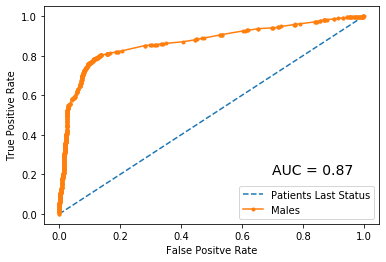

In [37]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mtest_fpr, mtest_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(my_pred_fpr, my_pred_tpr, marker = '.', label = 'Males')
plt.text(0.7, 0.2, "AUC = " + str(my_pred_auc), fontsize = 14)
## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
## Show Legend
plt.legend()

In [1]:
## CONSIDERING THE FEMALE DATA
## The new fitted logistic regression model with selected variables
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
BC = (pd.read_excel('cancer.xlsx'))
BCF=BC[BC.Gender==0]

fy=BCF.PatStatus
fx=BCF.drop(['PatStatus','PAT_ID', 'Gender'],axis=1)


In [2]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
#Split the Male data into train and test sets #
fx_train, fx_test, fy_train, fy_test=train_test_split(fx,fy, test_size=0.2, random_state=125)


In [3]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
fx_train_minmax = min_max_scaler.fit_transform(fx_train)
fx_test_minmax = min_max_scaler.fit_transform(fx_test)


In [4]:
 ## FITTING LOGISTIC REGRESSION FOR FEMALE DATA
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [5]:
flog_reg = sm.Logit(fy_train, fx_train)
flog_reg = flog_reg.fit()

Optimization terminated successfully.
         Current function value: 0.433132
         Iterations 7


In [6]:
print(flog_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              PatStatus   No. Observations:                67522
Model:                          Logit   Df Residuals:                    67499
Method:                           MLE   Df Model:                           22
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.3749
Time:                        12:56:46   Log-Likelihood:                -29246.
converged:                       True   LL-Null:                       -46789.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Race            0.0059      0.001      9.034      0.000       0.005       0.007
MarST           0.0730      0.021      3.523      0.000       0.032       0.114
AgeDiag         0.0078      0.001     11.084    

In [7]:
### The new fitted logistic regression model with selected variables
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
BC = (pd.read_excel('cancer.xlsx'))
BCF=BC[BC.Gender==0]

fy=BCF.PatStatus
fx=BCF.drop(['PatStatus','PAT_ID', 'Gender','Suture','Dermal'],axis=1)

In [8]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
#Split the Male data into train and test sets #
fx_train, fx_test, fy_train, fy_test=train_test_split(fx,fy, test_size=0.2, random_state=125)


In [9]:
fx_train.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,NipRet,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,SkinnLesson
88023,1,0,42,3,0,9,15,4,1,1,...,1,0,1,2,1,0,1,0,1,0
92578,1,0,66,1,0,8,8,3,1,1,...,0,0,1,2,0,1,1,0,1,1
75760,1,1,61,3,0,9,9,5,1,1,...,0,0,0,2,1,1,0,1,2,0
51727,1,1,50,1,0,15,10,4,1,1,...,1,0,1,4,1,0,0,0,1,0
3377,1,1,78,2,1,5,2,8,1,1,...,1,1,0,1,1,0,1,0,2,0


In [10]:
fx_test.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,NipRet,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,SkinnLesson
41774,1,1,67,2,0,16,9,2,1,0,...,1,1,0,2,1,1,1,0,1,1
84188,16,1,41,3,0,8,8,8,1,1,...,1,0,1,2,1,0,1,1,2,0
55207,1,1,50,1,0,6,10,9,1,0,...,0,1,1,3,1,0,0,1,2,0
51157,1,1,78,3,0,1,10,9,1,1,...,1,1,1,3,1,1,1,0,1,1
99358,1,1,77,2,0,10,12,3,1,0,...,1,1,0,2,0,1,1,0,1,1


In [11]:
fx_train.shape

(67522, 21)

In [12]:
fx_test.shape

(16881, 21)

In [13]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
fx_train_minmax = min_max_scaler.fit_transform(fx_train)
fx_test_minmax = min_max_scaler.fit_transform(fx_test)


In [14]:
 ## FITTING LOGISTIC REGRESSION FOR FEMALE DATA
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [15]:
flog_reg = sm.Logit(fy_train, fx_train)
flog_reg = flog_reg.fit()

flog_reg1 = LogisticRegression()
flog_reg1.fit(fx_train, fy_train)

Optimization terminated successfully.
         Current function value: 0.433149
         Iterations 7


C:\Users\eagye\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(flog_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              PatStatus   No. Observations:                67522
Model:                          Logit   Df Residuals:                    67501
Method:                           MLE   Df Model:                           20
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.3749
Time:                        12:59:29   Log-Likelihood:                -29247.
converged:                       True   LL-Null:                       -46789.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Race            0.0059      0.001      9.026      0.000       0.005       0.007
MarST           0.0728      0.021      3.513      0.000       0.032       0.113
AgeDiag         0.0078      0.001     11.070    

In [17]:
## Score of the model giving the accuracy of the model
print("Accuracy", (flog_reg1.score(fx_test_minmax, fy_test)))

Accuracy 0.7837213435223032


In [18]:
### PREDICTION ON THE TEST DATASET

In [20]:
### Getting the prediction for the Testing dataset
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

fx_train = fx_train_minmax
fx_test = fx_test_minmax 

In [24]:
tns_probs=[0 for _ in range(len(fy_test))]
fy_predict = flog_reg1.predict(fx_test)

In [25]:
## Keeping the probabilities for Testing outcomes
fy_pred = flog_reg1.predict_proba(fx_test)
fy_pred = fy_pred[:, 1]

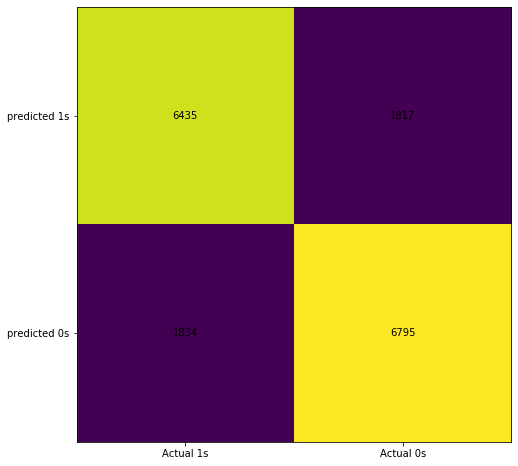

In [26]:
 ## confusion matrix
ftest_cm = confusion_matrix(fy_test, np.round(fy_predict))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(ftest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, ftest_cm[i, j], ha= 'center', va= 'center', color= 'black')
plt.show()

In [27]:
## Error for the prediction for test dataset outcomes
ftest_error = (ftest_cm[0,1] + ftest_cm[1,0])/np.sum(ftest_cm)
print(ftest_error)

0.2162786564776968


In [28]:
## Accuracy of prediction
1-ftest_error

0.7837213435223032

In [29]:
## Sensitivity Analysis
ftest_sens = ftest_cm[1, 1]/(ftest_cm[1, 1] + ftest_cm[0, 1])
print(ftest_sens)

0.7890153274500696


In [30]:
## Specificity Analysis
ftest_spec = ftest_cm[0, 0]/(ftest_cm[0, 0] + ftest_cm[1, 0])
print(ftest_spec)

0.7782077639375983


In [31]:
## PPV Analysis
ftest_npv = ftest_cm[1, 1]/(ftest_cm[1, 1] + ftest_cm[1, 0])
print(ftest_npv)

0.7874608877042532


In [32]:
## NPV Analysis
ftest_npv = ftest_cm[0, 0]/(ftest_cm[0, 0] + ftest_cm[0, 1])
print(ftest_npv)

0.7798109549200194


In [33]:
## The AUC Score
ftest_auc = roc_auc_score(fy_test, tns_probs)
fy_pred_auc = np.round(roc_auc_score(fy_test, fy_pred), decimals = 2)

In [34]:
 print(ftest_auc)

0.5


In [35]:
print(np.round(fy_pred_auc, decimals = 2))

0.86


In [36]:
## calculate ROC Curves
ftest_fpr, ftest_tpr, _ = roc_curve(fy_test, tns_probs)
fy_pred_fpr, fy_pred_tpr, _ = roc_curve(fy_test, fy_pred)

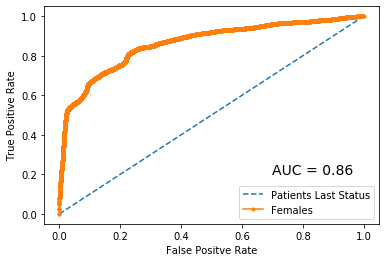

In [37]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(ftest_fpr, ftest_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(fy_pred_fpr, fy_pred_tpr, marker = '.', label = 'Females')
plt.text(0.7, 0.2, "AUC = " + str(fy_pred_auc), fontsize = 14)
## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
## Show Legend
plt.legend()